In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [3]:
faces.data.shape

(400, 4096)

In [4]:
# Aplique min-max scaler al dataset
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(faces.data)

In [5]:
# Calcule PCA con 400 componentes
from sklearn.decomposition import PCA

n_components = 400
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=400)

In [6]:
# Calcular el numero de componentes que retienen el 55% de la varianza del dataset
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i

In [7]:
min_var(0.55, pca.explained_variance_ratio_)

6

In [8]:
# Cacula el numero de componentes que retienen el 70% de la varianza del dataset
min_var(0.70, pca.explained_variance_ratio_)

13

In [9]:
# Calcula el numero de componentes que retienen el 99% de la varianza del dataset
min_var(0.99, pca.explained_variance_ratio_)

260

In [10]:
# Ajuste el dataset usando un PCA que retenga el 55% de la varianza
n_components = 6
pca55 = PCA(n_components=n_components)
X_pca55 = pca55.fit_transform(X)

In [11]:
# Ajuste el dataset usando un PCA que retenga el 70% de la varianza
n_components = 13
pca70 = PCA(n_components=n_components)
X_pca70 = pca70.fit_transform(X)

In [12]:
# Ajuste el dataset usando un PCA que retenga el 99% de la varianza
n_components = 260
pca99 = PCA(n_components=n_components)
X_pca99 = pca99.fit_transform(X)

In [13]:
# Calcule las pairwise euclidean distances para las tres proyecciones PCA anteriores
from scipy.spatial import distance
import numpy as np

def euclidean_pairwise(X):
    n = X.shape[0]
    x = []
    for i in range(0,n-1):
        for j in range(i+1,n):
            dist = distance.euclidean(X[i,],X[j,])
            x.append(dist)
    
    return np.array(x)

In [14]:
x_euc55 = euclidean_pairwise(X_pca55)
x_euc70 = euclidean_pairwise(X_pca70)
x_euc99 = euclidean_pairwise(X_pca99)

In [15]:
#Muestre los histogramas de las 3 pairwise euclidean distances.
import matplotlib.pyplot as plt
def plot_hist(X, title):
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.85)
    plt.grid(axis='y')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))

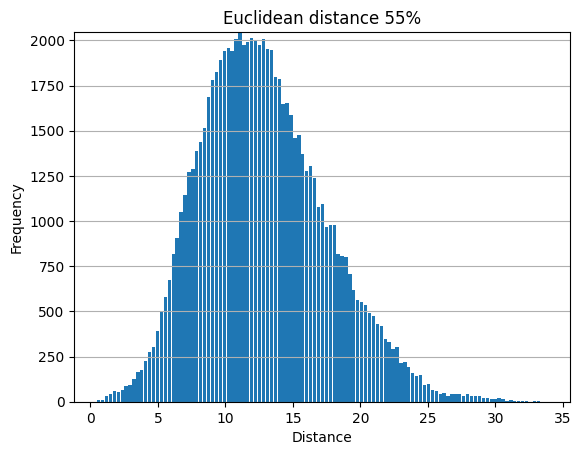

In [16]:
plot_hist(x_euc55, 'Euclidean distance 55%')

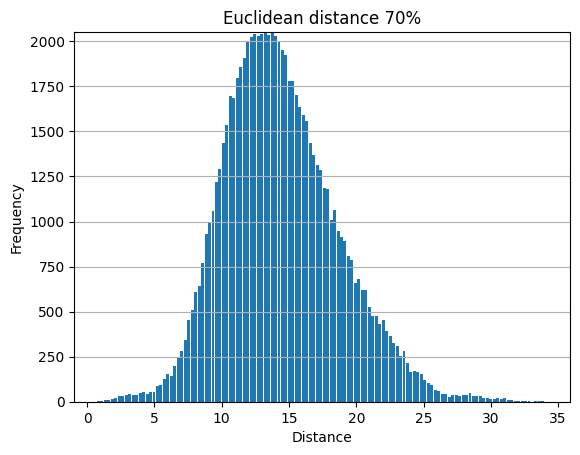

In [17]:
plot_hist(x_euc70, 'Euclidean distance 70%')

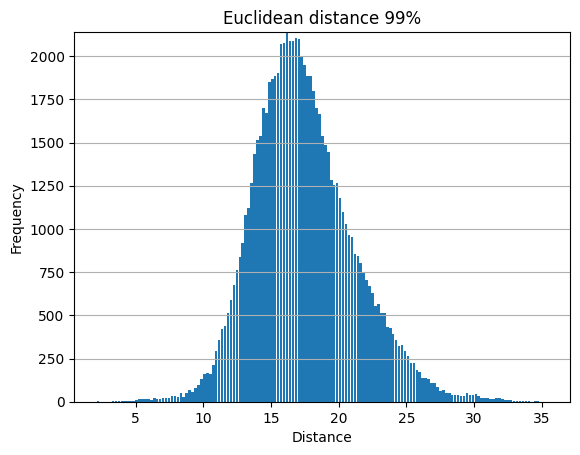

In [18]:
plot_hist(x_euc99, 'Euclidean distance 99%')

Interpretar

se puede apreciar  como a medida que aumenta la varianza la frecuencia de los datos se hace mayor en distancias mayores, lo que implica que aumenta la distancia euclidiana promedio del conjunto. Los datos son caras lo que implica que a mayor varianza de los datos las caras son más distintas entre sí. viendose reflejado en la distancia euclidiana.